   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185
5        2       3   9413  8259     5126     666              1795        1451
6        2       3  12126  3199     6975     480              3140         545
Accuracy: 0.8409090909090909
Precision: 0.7071280991735537
Recall: 0.8409090909090909
F1 Score: 0.7682379349046016
AUC: 0.5231674331033794


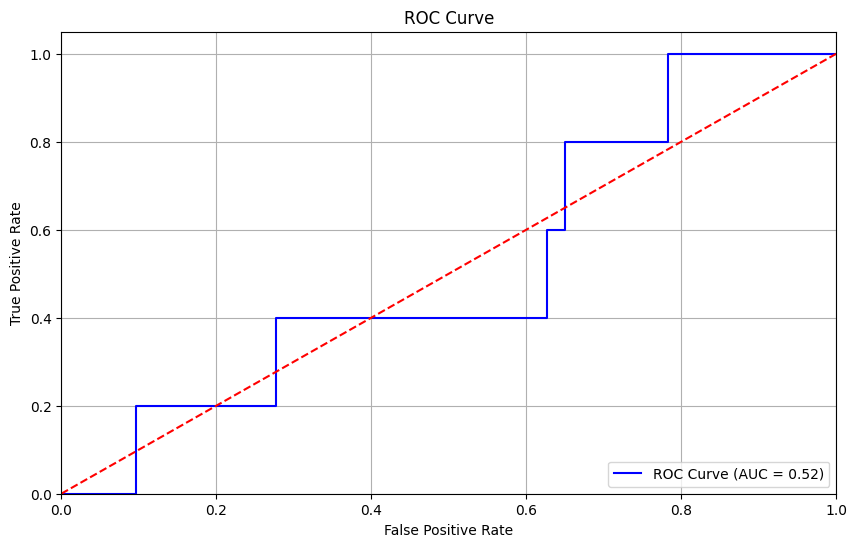

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


df = pd.read_csv('/content/Wholesale customers data.csv')
df.columns = df.columns.str.strip()
X = df.drop(columns=['Region'])
y = df['Region']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X = X.apply(pd.to_numeric, errors='coerce')

print(df.head(7))

#dividir - entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#escalar datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm = SVC(probability=True)

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4]
}

grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test_scaled)

accuracySVM = accuracy_score(y_test, y_pred)
precisionSVM = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recallSVM = recall_score(y_test, y_pred, average='weighted')
f1SVM = f1_score(y_test, y_pred, average='weighted')

y_probs = best_svm.predict_proba(X_test_scaled)
auc = roc_auc_score(y_test, y_probs, multi_class='ovr')
fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1], pos_label=1)

print(f"Accuracy: {accuracySVM}")
print(f"Precision: {precisionSVM}")
print(f"Recall: {recallSVM}")
print(f"F1 Score: {f1SVM}")
print(f"AUC: {auc}")

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()



DecisionTreeClassifier

Accuracy: 0.5795454545454546
Precision: 0.7136405925281524
Recall: 0.5795454545454546
F1 Score: 0.6313120209020234
AUC: 0.4977579602522411


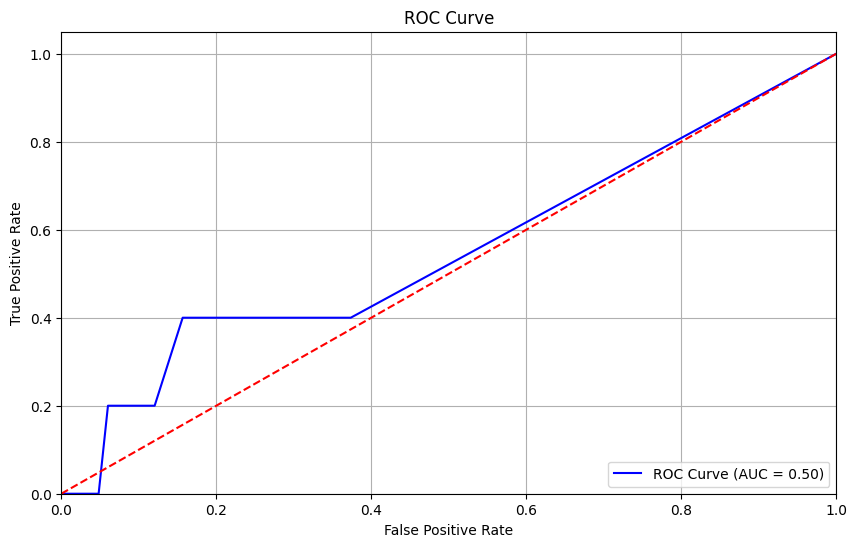

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

df = pd.read_csv('/content/Wholesale customers data.csv')
df.columns = df.columns.str.strip()
X = df.drop(columns=['Region'])
y = df['Region']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Asegurarse de que todos los datos sean numéricos
X = X.apply(pd.to_numeric, errors='coerce')

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

decision_tree = DecisionTreeClassifier()

# Definir el conjunto de parámetros para la búsqueda
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(decision_tree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_tree = grid_search.best_estimator_
y_pred = best_tree.predict(X_test)

accuracyDT = accuracy_score(y_test, y_pred)
precisionDT = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recallDT = recall_score(y_test, y_pred, average='weighted')
f1DT = f1_score(y_test, y_pred, average='weighted')

y_probs = best_tree.predict_proba(X_test)
auc = roc_auc_score(y_test, y_probs, multi_class='ovr')

fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1], pos_label=1)

print(f"Accuracy: {accuracyDT}")
print(f"Precision: {precisionDT}")
print(f"Recall: {recallDT}")
print(f"F1 Score: {f1DT}")
print(f"AUC: {auc}")

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


RandomForestClassifier

Accuracy: 0.8295454545454546
Precision: 0.7055903866248694
Recall: 0.8295454545454546
F1 Score: 0.7625635234330886
AUC: 0.5283914974474682


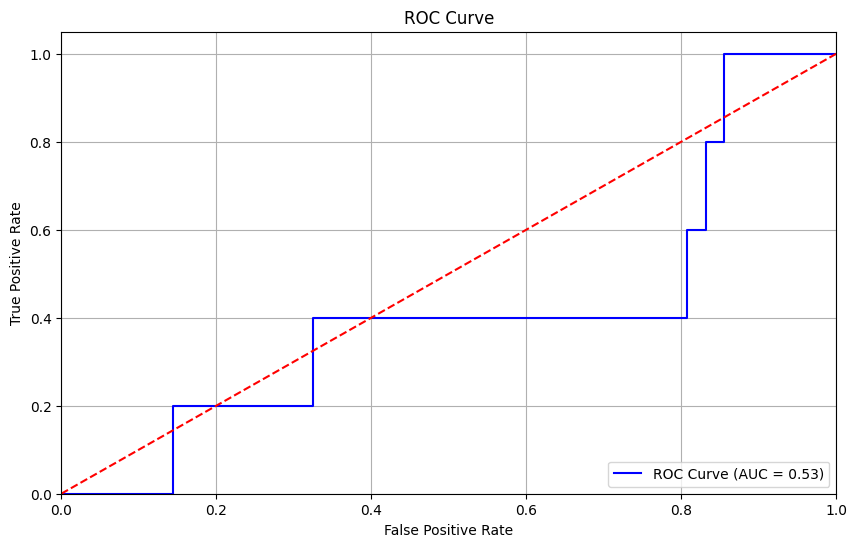

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

df = pd.read_csv('/content/Wholesale customers data.csv')
df.columns = df.columns.str.strip()
X = df.drop(columns=['Region'])
y = df['Region']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X = X.apply(pd.to_numeric, errors='coerce')

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

random_forest = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
}


grid_search = GridSearchCV(random_forest, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_forest = grid_search.best_estimator_
y_pred = best_forest.predict(X_test)

accuracyRF = accuracy_score(y_test, y_pred)
precisionRF = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recallRF = recall_score(y_test, y_pred, average='weighted')
f1RF = f1_score(y_test, y_pred, average='weighted')

y_probs = best_forest.predict_proba(X_test)
auc = roc_auc_score(y_test, y_probs, multi_class='ovr')

fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1], pos_label=1)

print(f"Accuracy: {accuracyRF}")
print(f"Precision: {precisionRF}")
print(f"Recall: {recallRF}")
print(f"F1 Score: {f1RF}")
print(f"AUC: {auc}")

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


ExtraTreesClassifier

Accuracy: 0.8409090909090909
Precision: 0.7071280991735537
Recall: 0.8409090909090909
F1 Score: 0.7682379349046016
AUC: 0.46373584525940786


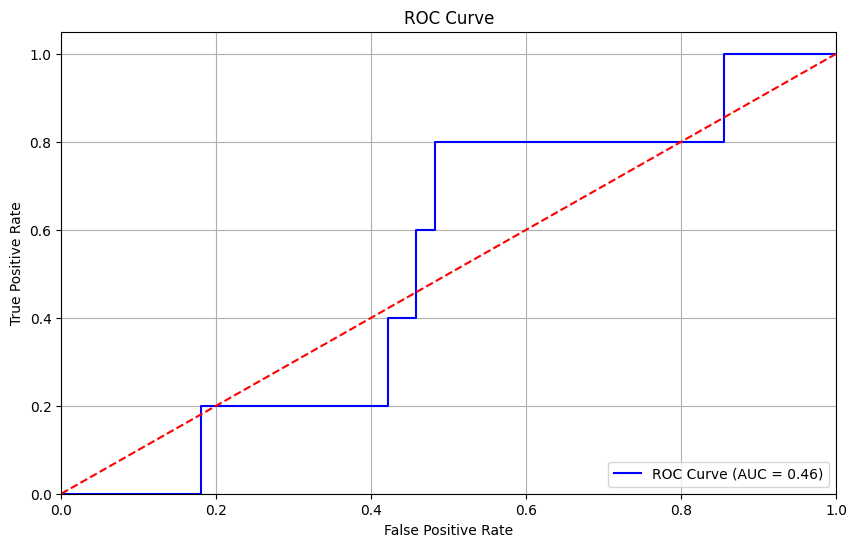

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Cargar datos
df = pd.read_csv('/content/Wholesale customers data.csv')
df.columns = df.columns.str.strip()
X = df.drop(columns=['Region'])
y = df['Region']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X = X.apply(pd.to_numeric, errors='coerce')

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

extra_trees = ExtraTreesClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
}

grid_search = GridSearchCV(extra_trees, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_trees = grid_search.best_estimator_
y_pred = best_trees.predict(X_test)


accuracyET = accuracy_score(y_test, y_pred)
precisionET = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recallET = recall_score(y_test, y_pred, average='weighted')
f1ET = f1_score(y_test, y_pred, average='weighted')


y_probs = best_trees.predict_proba(X_test)
auc = roc_auc_score(y_test, y_probs, multi_class='ovr')


fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1], pos_label=1)

# Imprimir resultados
print(f"Accuracy: {accuracyET}")
print(f"Precision: {precisionET}")
print(f"Recall: {recallET}")
print(f"F1 Score: {f1ET}")
print(f"AUC: {auc}")

# Graficar la curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()
